# Extended Data Figure 1 

![title](../assets/EDFig1.png)

In [19]:
%load_ext autoreload
%autoreload 2

import os
import sys
import logging
from pathlib import Path

logging.getLogger("matplotlib.font_manager").disabled = True

import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
from mycolorpy import colorlist as mcp
from common import *

sys.path.append('./prepare_data')

DATA_PATH = Path(
    "../data"
)
EXPORT_PATH = Path(
    "../results/EDFigure1"
)
EXPORT_PATH.mkdir(exist_ok=True, parents=True)

leg_angles = [
    'ThC_roll',
    'ThC_yaw',
    'ThC_pitch',
    'CTr_roll',
    'CTr_pitch',
    'FTi_pitch',
    'TiTa_pitch',
]

COLOR_LEGS = {
    'RF': COLORS['blue'],
    'LF': COLORS['vermillion'],
    'RAnt': COLORS['skyblue'],
    'LAnt': COLORS['orange'],
    "Neck": COLORS['pink'],
    "Bristles": COLORS['green'],
}

COLOR_ANGLES = {
    'Angle_head_roll': COLORS['green'],
    'Angle_head_pitch': COLORS['black'],
    'Angle_antenna_pitch_R': COLORS['skyblue'],
    'Angle_antenna_pitch_L': COLORS['orange'],
}

colors_piyg = mcp.gen_color(cmap="PiYG",n=5)

COLOR_BEHAVIORS = {
    "unilateral_t_left": colors_piyg[0],
    "unilateral_nt_left": colors_piyg[1],
    "bilateral": COLORS['grey'],
    "unilateral_nt_right": colors_piyg[3],
    "unilateral_t_right": colors_piyg[4],
    "nc_grooming": COLORS['skyblue'],
    "background": COLORS['yellow'],
}

FIGSIZE = {'width': 1.2, 'length': 0.9}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
panelsIK_data = load_data(DATA_PATH / "Fig1_panelI-K.pkl")


## Panel B

In [21]:
# Labels etc.
color_behaviors = {
    "unilateral_t_left": "#8e0152",
    "unilateral_nt_left": "#e897c4",
    "bilateral": "#D3D3D3",
    "unilateral_nt_right": "#9acd61",
    "unilateral_t_right": "#276419",
    "nc_grooming": "#56B4E9",
}

color_palette_antennal_pitch = {
    "unilateral_t_left_Angle_antenna_pitch_R": "#8e0152",
    "unilateral_t_left_Angle_antenna_pitch_L": "#fe92d0",
    "space0": "#FFFFFF",
    "unilateral_nt_left_Angle_antenna_pitch_R": "#e897c4",
    "unilateral_nt_left_Angle_antenna_pitch_L": "#f8e0ed",
    "space1": "#FFFFFF",
    "bilateral_Angle_antenna_pitch_R": "#D3D3D3",
    "bilateral_Angle_antenna_pitch_L": "#f2f2f2",
    "space2": "#FFFFFF",
    "unilateral_nt_right_Angle_antenna_pitch_R": "#9acd61",
    "unilateral_nt_right_Angle_antenna_pitch_L": "#e1f0d0",
    "space3": "#FFFFFF",
    "unilateral_t_right_Angle_antenna_pitch_R": "#276419",
    "unilateral_t_right_Angle_antenna_pitch_L": "#b0e8a3",
    "space4": "#FFFFFF",
    "nc_grooming_Angle_antenna_pitch_R": "#56B4E9",
    "nc_grooming_Angle_antenna_pitch_L": "#cce8f8",
}

behavior_labels = [
    "uni tri L",
    "uni non-tri L",
    "bilateral",
    "uni non-tri R",
    "uni tri R",
    "non-classified",
]

/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_94686/1487268529.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(
/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_94686/1487268529.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(
/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_94686/1487268529.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(
/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_94686/1487268529.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is depre

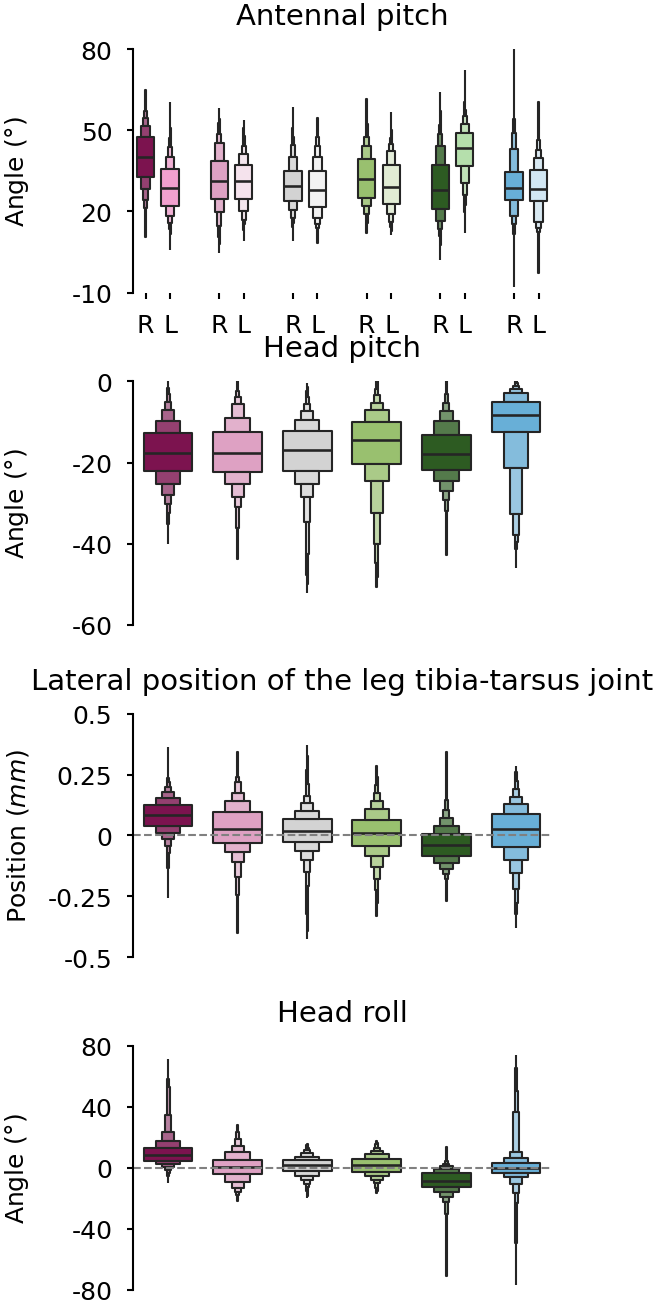

In [22]:
# Prepare the data frames

df_antenna_pitch = pd.melt(
    panelsIK_data,
    id_vars=["beh_label"],
    value_vars=["Angle_antenna_pitch_R", "Angle_antenna_pitch_L"],
    var_name="antenna_pitch",
)

df_antenna_pitch["combined"] = df_antenna_pitch[["beh_label", "antenna_pitch"]].agg(
    "_".join, axis=1
)

panelsIK_data["Pose_Tarsus_y_mean"] = 0.5 * (
    panelsIK_data["Pose_RF_Tarsus_y"]
    + panelsIK_data["Pose_LF_Tarsus_y"]
)

df_tita_pos_y = pd.melt(
    panelsIK_data,
    id_vars=["beh_label"],
    value_vars=["Pose_RF_Tarsus_y", "Pose_LF_Tarsus_y"],
    var_name="tita_pos_y",
)

df_tita_pos_y["combined"] = df_tita_pos_y[["beh_label", "tita_pos_y"]].agg(
    "_".join, axis=1
)

with plt.style.context("./config.mplstyle"):

    fig, axs = plt.subplots(
        4, 1, figsize=(FIGSIZE["width"] * 1.5, FIGSIZE["length"] * 4.8), dpi=300
    )

    # TOP LEFT - Antennal pitch
    sns.boxenplot(
        ax=axs[0],
        x="combined",
        y="value",
        data=df_antenna_pitch,
        showfliers=False,
        palette=color_palette_antennal_pitch,
        width=0.7,
        order=list(color_palette_antennal_pitch.keys()),
        linewidth=0.5,
    )
    axs[0].set_title("Antennal pitch")

    x_tick_labels = [
        "R",
        "L",
    ] * 6
    # Set xticks
    axs[0].set_xticks(
        rotation=0,
        ticks=[0, 1, 3, 4, 6, 7, 9, 10, 12, 13, 15, 16],
        labels=x_tick_labels,
        minor=False,
    )
    axs[0].set_ylim(-80, 10)
    axs[0].invert_yaxis()
    axs[0].set_yticks(rotation=0, ticks=[-80, -50, -20, 10], labels=[80, 50, 20, -10])
    axs[0].set_ylabel("Angle ($\degree$)")
    axs[0].set_xlabel("")
    axs[0].spines["bottom"].set_visible(False)

    sns.boxenplot(
        ax=axs[1],
        x="beh_label",
        y="Angle_head_pitch",
        data=panelsIK_data,
        showfliers=False,
        palette=color_behaviors,
        width=0.7,
        order=list(color_behaviors.keys()),
        linewidth=0.5,
    )
    axs[1].set_title("Head pitch")
    axs[1].set_xticks([])
    axs[1].set_yticks(rotation=0, ticks=[0, 20, 40, 60], labels=[0, -20, -40, -60])
    axs[1].set_ylim(60, 0)
    axs[1].set_ylabel("Angle ($\degree$)")
    axs[1].set_xlabel("")

    axs[1].spines["bottom"].set_visible(False)

    sns.boxenplot(
        ax=axs[2],
        x="beh_label",
        y="Pose_Tarsus_y_mean",
        data=panelsIK_data,
        showfliers=False,
        palette=color_behaviors,
        width=0.7,
        order=list(color_behaviors.keys()),
        linewidth=0.5,
    )
    axs[2].set_title("Lateral position of the leg tibia-tarsus joint")
    axs[2].axhline(0, color="grey", linestyle="--")

    axs[2].set_ylim(-0.5, 0.5)
    axs[2].set_xticks([])
    axs[2].set_yticks(
        rotation=0,
        ticks=[-0.5, -0.25, 0, 0.25, 0.5],
        labels=[-0.5, -0.25, 0, 0.25, 0.5],
    )
    axs[2].set_ylabel("Position ($mm$)")
    axs[2].set_xlabel("")
    axs[2].spines["bottom"].set_visible(False)

    sns.boxenplot(
        ax=axs[3],
        x="beh_label",
        y="Angle_head_roll",
        data=panelsIK_data,
        showfliers=False,
        palette=color_behaviors,
        width=0.7,
        order=list(color_behaviors.keys()),
        linewidth=0.5,
    )
    axs[3].set_title("Head roll")
    # horizontal line
    axs[3].axhline(0, color="grey", linestyle="--")

    axs[3].set_ylim(-80, 80)
    axs[3].invert_yaxis()
    axs[3].set_xticks([])
    axs[3].set_yticks(
        rotation=0, ticks=[-80, -40, 0, 40, 80], labels=[80, 40, 0, -40, -80]
    )

    axs[3].set_ylabel("Angle ($\degree$)")
    axs[3].set_xlabel("")
    axs[3].spines["bottom"].set_visible(False)

    # align y labels in the vertical axis
    fig.align_xlabels(axs[:])
    plt.tight_layout(pad=-0.1)
    fig.align_ylabels(axs[:])

    fig.savefig(EXPORT_PATH / f"EDFig1_panelB.png", dpi=300, bbox_inches="tight")
    plt.show()

## Panel C

/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_94686/3328244132.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(
/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_94686/3328244132.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(
/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_94686/3328244132.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(
/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_94686/3328244132.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprec

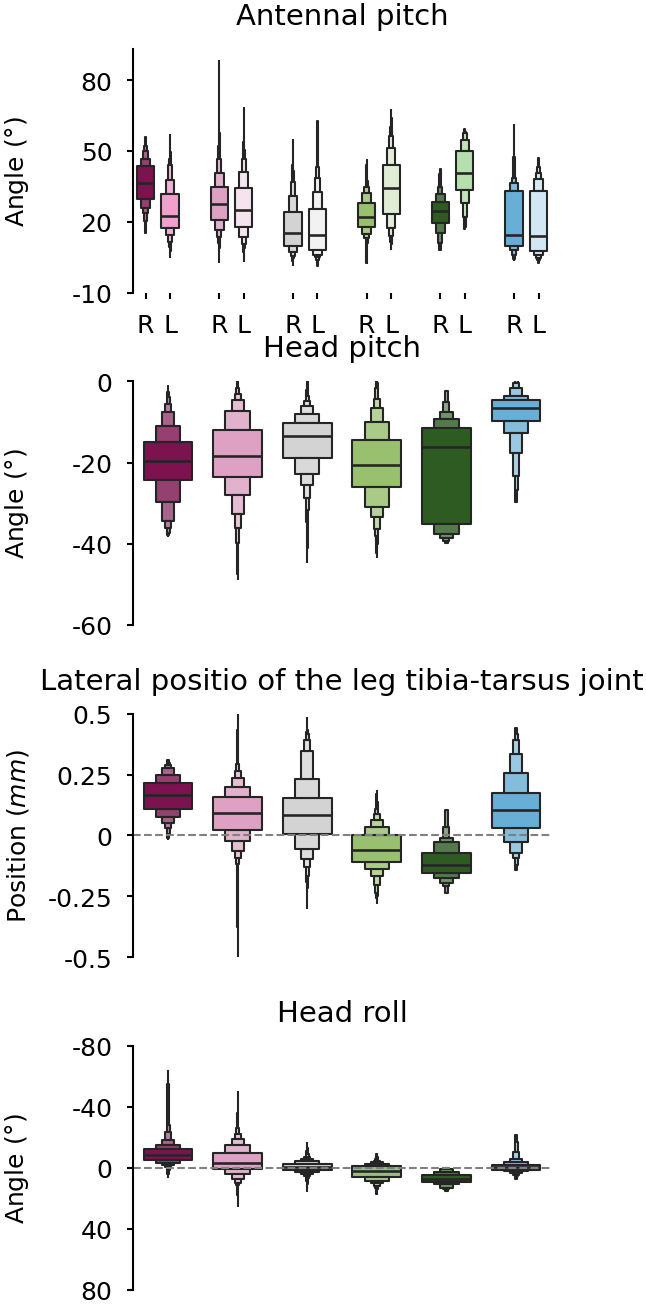

In [23]:
panelc_data = load_data(DATA_PATH / "EDFig1_panelC.pkl")

df_antenna_pitch_c = pd.melt(
    panelc_data,
    id_vars=["label"],
    value_vars=["Angle_antenna_pitch_R", "Angle_antenna_pitch_L"],
    var_name="antenna_pitch",
)

df_antenna_pitch_c["combined"] = df_antenna_pitch_c[["label", "antenna_pitch"]].agg(
    "_".join, axis=1
)

with plt.style.context("./config.mplstyle"):

    fig, axs = plt.subplots(
        4, 1, figsize=(FIGSIZE["width"] * 1.5, FIGSIZE["length"] * 4.8), dpi=300
    )
    sns.boxenplot(
        ax=axs[0],
        x="combined",
        y="value",
        data=df_antenna_pitch_c,
        showfliers=False,
        palette=color_palette_antennal_pitch,
        width=0.7,
        order=list(color_palette_antennal_pitch.keys()),
        linewidth=0.5,
    )
    axs[0].set_title("Antennal pitch")

    x_tick_labels = [
        "R",
        "L",
    ] * 6
    # Set xticks
    axs[0].set_xticks(
        rotation=0,
        ticks=[0, 1, 3, 4, 6, 7, 9, 10, 12, 13, 15, 16],
        labels=x_tick_labels,
        minor=False,
    )
    axs[0].invert_yaxis()
    # axs[0].set_ylim(-80, 10)
    axs[0].set_yticks(rotation=0, ticks=[-80, -50, -20, 10], labels=[80, 50, 20, -10])
    axs[0].set_ylabel("Angle ($\degree$)")
    axs[0].set_xlabel("")
    axs[0].spines["bottom"].set_visible(False)

    sns.boxenplot(
        ax=axs[1],
        x="label",
        y="head_pitch",
        data=panelc_data,
        showfliers=False,
        palette=color_behaviors,
        width=0.7,
        order=list(color_behaviors.keys()),
        linewidth=0.5,
    )
    axs[1].set_title("Head pitch")
    axs[1].set_xticks([])
    axs[1].set_yticks(rotation=0, ticks=[0, 20, 40, 60], labels=[0, -20, -40, -60])
    axs[1].set_ylim(60, 0)
    axs[1].set_ylabel("Angle ($\degree$)")
    axs[1].set_xlabel("")

    axs[1].spines["bottom"].set_visible(False)

    sns.boxenplot(
        ax=axs[2],
        x="label",
        y="tita_y",
        data=panelc_data,
        showfliers=False,
        palette=color_behaviors,
        width=0.7,
        order=list(color_behaviors.keys()),
        linewidth=0.5,
    )
    axs[2].set_title("Lateral positio of the leg tibia-tarsus joint")
    axs[2].axhline(0, color="grey", linestyle="--")

    axs[2].set_ylim(-0.5, 0.5)
    axs[2].set_xticks([])
    axs[2].set_yticks(
        rotation=0,
        ticks=[-0.5, -0.25, 0, 0.25, 0.5],
        labels=[-0.5, -0.25, 0, 0.25, 0.5],
    )

    axs[2].set_ylabel("Position ($mm$)")
    axs[2].set_xlabel("")
    axs[2].spines["bottom"].set_visible(False)

    sns.boxenplot(
        ax=axs[3],
        x="label",
        y="head_roll",
        data=panelc_data,
        showfliers=False,
        palette=color_behaviors,
        width=0.7,
        order=list(color_behaviors.keys()),
        linewidth=0.5,
    )
    axs[3].set_title("Head roll")
    axs[3].axhline(0, color="grey", linestyle="--")

    axs[3].set_ylim(-80, 80)
    axs[3].invert_yaxis()

    axs[3].set_xticks([])
    axs[3].set_yticks(
        rotation=0, ticks=[-80, -40, 0, 40, 80], labels=[-80, -40, 0, 40, 80]
    )

    axs[3].set_ylabel("Angle ($\degree$)")
    axs[3].set_xlabel("")
    axs[3].spines["bottom"].set_visible(False)

    fig.align_xlabels(axs[:])
    plt.tight_layout(pad=-0.1)
    fig.align_ylabels(axs[:])

    fig.savefig(EXPORT_PATH / f"EDFig_panelC.png", dpi=300, bbox_inches="tight")

    plt.show()

## Panel D

In [24]:
from prepare_data import Fig1_prepare_data
from sklearn.decomposition import PCA

kinematics_df = load_data(DATA_PATH / "Fig1_panelK-M.pkl")
pca_data3d, pca_data, pca_data_labels, selected_keypoints = Fig1_prepare_data.prepare_pca_data(
    kinematics_df
)
correlation_matrix_median = Fig1_prepare_data.get_correlation_matrix(
    pca_data3d, pca_data_labels, selected_keypoints
)

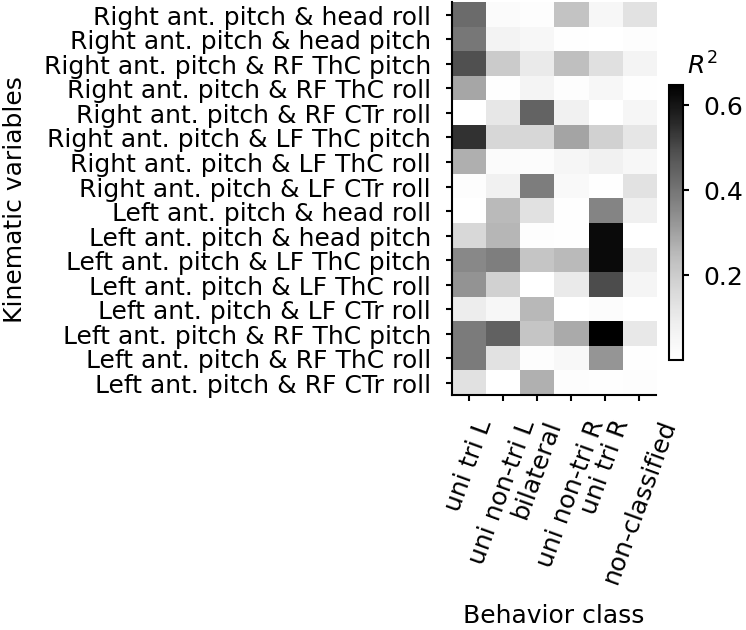

In [25]:
angles_to_correlate = [
    ("Angle_antenna_pitch_R", "Angle_head_roll"),
    ("Angle_antenna_pitch_R", "Angle_head_pitch"),
    ("Angle_antenna_pitch_R", "Angle_RF_ThC_pitch"),
    ("Angle_antenna_pitch_R", "Angle_RF_ThC_roll"),
    ("Angle_antenna_pitch_R", "Angle_RF_CTr_roll"),
    ("Angle_antenna_pitch_R", "Angle_LF_ThC_pitch"),
    ("Angle_antenna_pitch_R", "Angle_LF_ThC_roll"),
    ("Angle_antenna_pitch_R", "Angle_LF_CTr_roll"),
    ("Angle_antenna_pitch_L", "Angle_head_roll"),
    ("Angle_antenna_pitch_L", "Angle_head_pitch"),
    ("Angle_antenna_pitch_L", "Angle_LF_ThC_pitch"),
    ("Angle_antenna_pitch_L", "Angle_LF_ThC_roll"),
    ("Angle_antenna_pitch_L", "Angle_LF_CTr_roll"),
    ("Angle_antenna_pitch_L", "Angle_RF_ThC_pitch"),
    ("Angle_antenna_pitch_L", "Angle_RF_ThC_roll"),
    ("Angle_antenna_pitch_L", "Angle_RF_CTr_roll"),
]
y_labels = [
    " & ".join(
        (
            angle_first.replace("Angle_antenna_pitch_R", "Right ant. pitch").replace(
                "Angle_antenna_pitch_L", "Left ant. pitch"
            ),
            angle_second.replace("Angle_", "").replace("_", " "),
        )
    )
    for angle_first, angle_second in angles_to_correlate
]

x_labels = [
    "uni tri L",
    "uni non-tri L",
    "bilateral",
    "uni non-tri R",
    "uni tri R",
    "non-classified",
]

with plt.style.context("./config.mplstyle"):

    fig, ax = plt.subplots(figsize=(1.1, 1.7), dpi=300)
    ax.imshow(
        correlation_matrix_median,
        cmap="Greys",
        vmin=0,
        vmax=round(correlation_matrix_median.max(), 2),
    )

    neg = plt.imshow(correlation_matrix_median, cmap="Greys", aspect="auto")

    cbar = fig.colorbar(neg, ax=ax, anchor=(0, 0.3), shrink=0.7)
    cbar.set_label("$R^{2}$", rotation=0, labelpad=-10, y=1.12)

    ax.set_xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=70)
    ax.set_yticks(ticks=range(len(y_labels)), labels=y_labels, rotation=0)

    plt.ylabel("Kinematic variables")
    plt.xlabel("Behavior class")

    fig.savefig(EXPORT_PATH / "EDFig1_panelD.png", dpi=300, bbox_inches="tight")

    plt.show()